In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,False,False,False,False,False,False,True,False,False,True
1,53,1,0,140,203,1,0,155,1,3.1,...,False,False,False,False,False,False,True,True,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,False,False,False,False,False,False,True,True,False,False
3,61,1,0,148,203,0,1,161,0,0.0,...,False,False,False,False,False,False,True,False,False,True
4,62,0,0,138,294,1,1,106,0,1.9,...,False,False,False,False,False,True,False,False,True,False


In [6]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,False,True,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,False,False,False,True,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,False,False,False,True,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,False,True,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,False,True,False,False,True,False


In [7]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x_data)
x

array([[0.47916667, 1.        , 0.29245283, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.43396226, ..., 1.        , 0.        ,
        0.        ],
       [0.85416667, 1.        , 0.48113208, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.375     , 1.        , 0.1509434 , ..., 0.        , 1.        ,
        0.        ],
       [0.4375    , 0.        , 0.1509434 , ..., 0.        , 0.        ,
        1.        ],
       [0.52083333, 1.        , 0.24528302, ..., 0.        , 1.        ,
        0.        ]])

In [9]:
x = pd.DataFrame(x, columns=['age','sex','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','ca','cp_0','cp_1','cp_2','cp_3','thal_0','thal_1','thal_2','thal_3','slope_0','slope_1','slope_2'])

In [10]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.479167,1.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.500000,1.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.854167,1.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.666667,1.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.687500,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.75,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1021,0.645833,1.0,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1022,0.375000,1.0,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1023,0.437500,0.0,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
x_train

,315,204,363,5,1017,960,874,231,670,150,...,723,9,359,707,763,835,192,629,559,684
age,0.270833,0.770833,0.500000,0.604167,0.500000,0.479167,0.625000,0.562500,0.666667,0.604167,...,0.812500,0.520833,0.500000,0.562500,0.604167,0.416667,0.791667,0.750000,0.791667,0.645833
sex,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
trestbps,0.509434,0.490566,0.339623,0.056604,0.273585,0.396226,0.622642,0.245283,0.339623,0.188679,...,0.245283,0.264151,0.320755,0.433962,0.528302,0.226415,0.198113,0.415094,0.245283,0.433962
chol,0.269406,0.347032,0.273973,0.278539,0.356164,0.159817,0.335616,0.251142,0.465753,0.438356,...,0.194064,0.365297,0.205479,0.383562,0.358447,0.052511,1.000000,0.356164,0.253425,0.134703
fbs,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
restecg,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
thalach,0.816794,0.618321,0.778626,0.389313,0.183206,0.748092,0.412214,0.816794,0.748092,0.526718,...,0.335878,0.343511,0.335878,0.625954,0.694656,0.419847,0.679389,0.786260,0.000000,0.641221
exang,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oldpeak,0.129032,0.000000,0.000000,0.161290,0.322581,0.016129,0.000000,0.129032,0.000000,0.709677,...,0.241935,0.516129,0.000000,0.209677,0.161290,0.129032,0.258065,0.225806,0.161290,0.483871
ca,0.500000,0.250000,0.750000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.750000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.750000,0.000000,0.250000,0.000000,0.000000


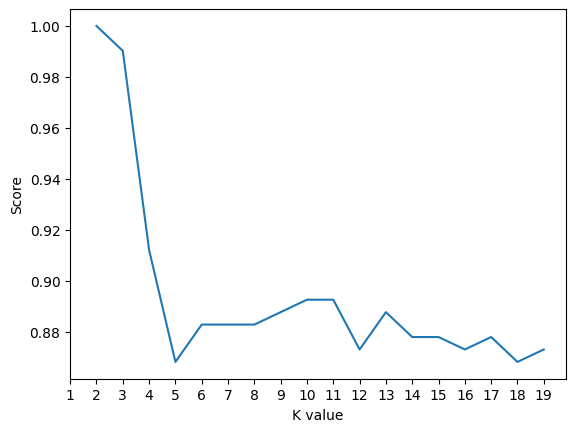

Maximum KNN Score is 100.00%


In [12]:
from sklearn.neighbors import KNeighborsClassifier
scoreList = []
for i in range(2,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(2,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [13]:
def scale(input):
    colunms = ['age','sex','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','ca','cp_0','cp_1','cp_2','cp_3','thal_0','thal_1','thal_2','thal_3','slope_0','slope_1','slope_2']
    a = pd.get_dummies(input['cp'], prefix = "cp")
    b = pd.get_dummies(input['thal'], prefix = "thal")
    c = pd.get_dummies(input['slope'], prefix = "slope")
    frames = [input, a, b, c]
    l = ['cp_0','cp_1','cp_2','cp_3','thal_0', 'thal_1', 'thal_2', 'thal_3','slope_0', 'slope_1', 'slope_2']
    p_input = {}
    for colunm in range(0,10):
        p_input[colunms[colunm]] = input[colunms[colunm]][0]

    for i in range(0,4):
        p_input[l[i]] = False
        if i - 0 == input['cp'][0]:
            p_input[l[i]] = True

    for i in range(4,8):
        p_input[l[i]] = False
        if i - 4 == input['thal'][0]:
            p_input[l[i]] = True

    for i in range(8,11):
        p_input[l[i]] = False
        if i - 8 == input['slope'][0]:
            p_input[l[i]] = True
    for colunm in colunms:
        p_input[colunm] = [p_input[colunm]]
    p_input = pd.DataFrame(data=p_input)
    input = scaler.transform(p_input)
    return(pd.DataFrame(input, columns=['age','sex','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','ca','cp_0','cp_1','cp_2','cp_3','thal_0','thal_1','thal_2','thal_3','slope_0','slope_1','slope_2']))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
input = pd.DataFrame(
    data=[[52,1,0,125,212,0,1,168,0,1,2,2,3]],
    columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
)
p_input = scale(input)
print(knn.predict(p_input))

[0]
